In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns
sns.set()
import math

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston

from statsmodels.stats.outliers_influence import variance_inflation_factor

### 리지(Ridge)와 라소(Lasso) 회귀(Regression)
- 선형 회귀는 잔차 제곱의 합계(RSS)만 최소화하는 반면 리지와 라소 회귀 분석은 튜닝 매개 변수 ${\lambda}$로 계수를 정규화하기 위해 계수에 패널티를 적용한다
- ${\lambda = 0}$이면 패널티에 영향이 없고 라지, 라소 회귀는 선형 회귀와 동일한 결과를 도출한다 반면 ${\lambda}$가 무한대로 가면 계수들을 0이 된다

### 리지 회귀(Ridge Regression), L2 규제
- 선형 회귀를 개선한 선형 모델 
- 선형 회귀와 비슷하지만 가중치의 값을 최대한 작게 만들어 각각의 특성이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
- 규제를 사용하면 다중공선성(mulicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있다.
- 수식
\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}
- ${\alpha=0}$이면 리지 회귀는 선형 회귀와 같아지고, ${\alpha}$가 커질수록 모든 가중치가 0에 가까워져 결국 데이터의 평균을 지나는 수평선이 된다
- ${\alpha}$: 사용자가 지정하는 매개변수
- ${\alpha}$가 크면 규제의 효과가 커지고, ${\alpha}$가 작으면 규제의 효과가 작아진다

### 라소 회귀(Lasso Regression), L1 규제
- 리지 회귀는 모든 예측 변수를 중요도에 따라 가중값만 축소시킬 뿐, 0값을 부여하지 않기 때문에 불필요한 변수가 제거되지 않고 항상 남아 있게 된다
- 라소 회귀는 불필요한 변수의 가중값에 0값을 부여해 제거한다 -> 모델의 간결한 표현 가능
- 수식
\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

In [8]:
# 입출력 데이터 생성
x_data = np.array([1, 2, 3])
y_data = np.array([1, 2, 3])

### 선형 회귀

In [7]:
# Mean Square Error 계산 함수
def cost(x, y, w):
    n = len(x)
    hy = w * x
    loss = np.sum((hy - y) ** 2) / n
    
    return loss

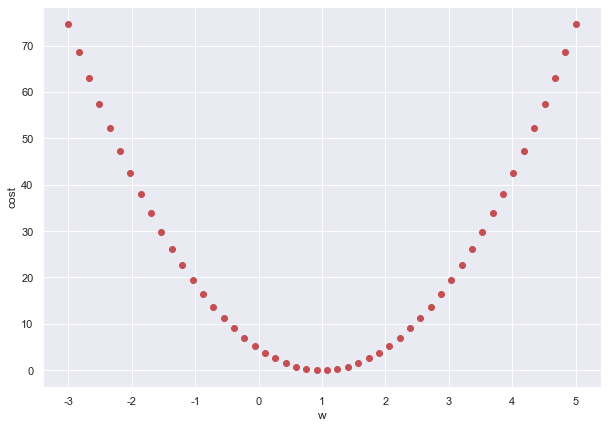

In [9]:
# 가중치에 따른 cost 값 시각화
plt.xlabel('w')
plt.ylabel('cost')
for w in np.linspace(-3, 5, 50):
    c = cost(x_data, y_data, w)
    plt.plot(w, c, 'ro')
plt.show()

가중치가 1일 때 cost값 최소 

### 리지 회귀, L2

In [11]:
# cost 값 계산 함수
def cost_l2norm(x, y, w, a):
    n = len(x)
    hy = w * x
    loss = np.sum((hy - y) ** 2) / n + a * (w ** 2)
    
    return loss

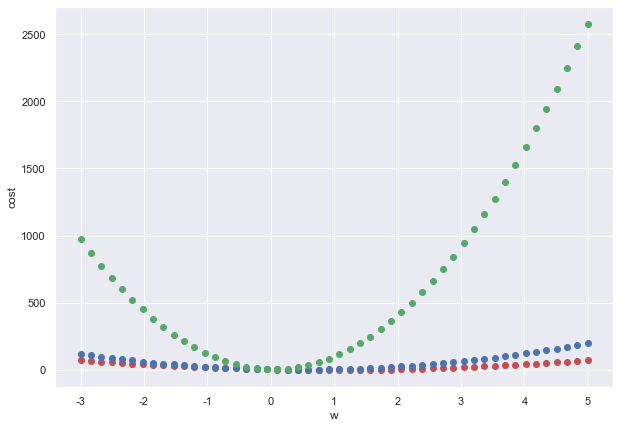

In [19]:
# 각 a 값에 대한 가중치에 따른 cost값 시각화
plt.xlabel('w')
plt.ylabel('cost')
# a값과 color 담긴 리스트
li = [(0, 'ro'), (5, 'bo'), (100, 'go')]

for w in np.linspace(-3, 5, 50):
    for a, color in li:
        c = cost_l2norm(x_data, y_data, w, a=a)
        plt.plot(w, c, color)
plt.show()

a=0이면 리지 회귀는 선형 회귀와 같아지고, a 값이 커질수록 수평선에 가까워짐을 확인할 수 있다

### 라소 회귀, L1

In [20]:
# cost 값 계산 함수
def cost_l2norm(x, y, w, a):
    n = len(x)
    hy = w * x
    loss = np.sum((hy - y) ** 2) / n + a * math.fabs(w)
    
    return loss

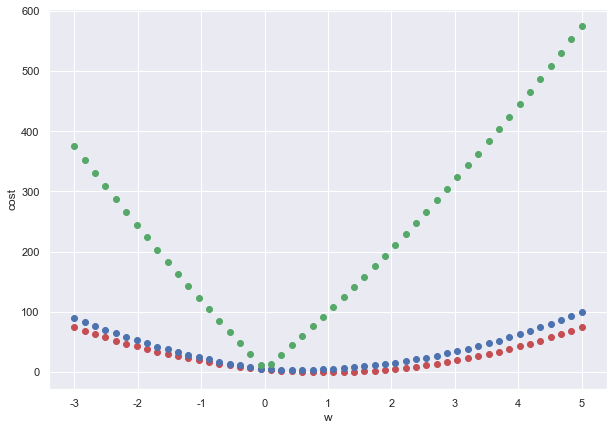

In [21]:
# 각 a 값에 대한 가중치에 따른 cost값 시각화
plt.xlabel('w')
plt.ylabel('cost')
# a값과 color 담긴 리스트
li = [(0, 'ro'), (5, 'bo'), (100, 'go')]

for w in np.linspace(-3, 5, 50):
    for a, color in li:
        c = cost_l2norm(x_data, y_data, w, a=a)
        plt.plot(w, c, color)
plt.show()